#Business Problem

A large Toyota car dealership offers purchasers of new Toyota cars the option to buy their used car as part of a trade-in. In particular, a new promotion promises to pay high prices for used Toyota Corolla cars for purchasers of a new car. The dealer then sells the used cars for a small profit. To ensure a reasonable profit, the dealer needs to be able to predict the price that the dealership will get for the used cars.

#Objective
* Exploratory Data Analysis
* Price Prediction

#Data 
* Source - https://www.kaggle.com/datasets/tolgahancepel/toyota-corolla

Target variable :
- **Price:** Offer Price 

Features:

- **Age**: Age in months
- **KM**: Accumulated kilometers on odometer
- **FuelType**: Fuel type (Petrol, Diesel, CNG)
- **HP**: HorsePower
- **MetColor**: Metallic color? (Yes = 1, No = 0)
- **Automatic**: Automatic (Yes = 1, No = 0)
- **CC**: Cylinder volume in cubic centimeters
- **Doors**: Number of doors
- **Weight**: Weight in kilograms

In [1]:
#Library for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ToyotaCorolla.csv.xls')

In [3]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [4]:
print(df.shape)

df.info()

(1436, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
df.isnull().values.any()

False

* Dataset contains no missing values.
* One categorical column - Fuel Type

In [6]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [7]:
pd.DataFrame(((df['FuelType'].value_counts(normalize = True))*100).round(2))

,FuelType
Petrol,88.02
Diesel,10.79
CNG,1.18


88% of the cars are Petrol cars, followed by only 10.8% Diesel cars and 1.18% CNG cars.

Let's visualise the data using graphs.

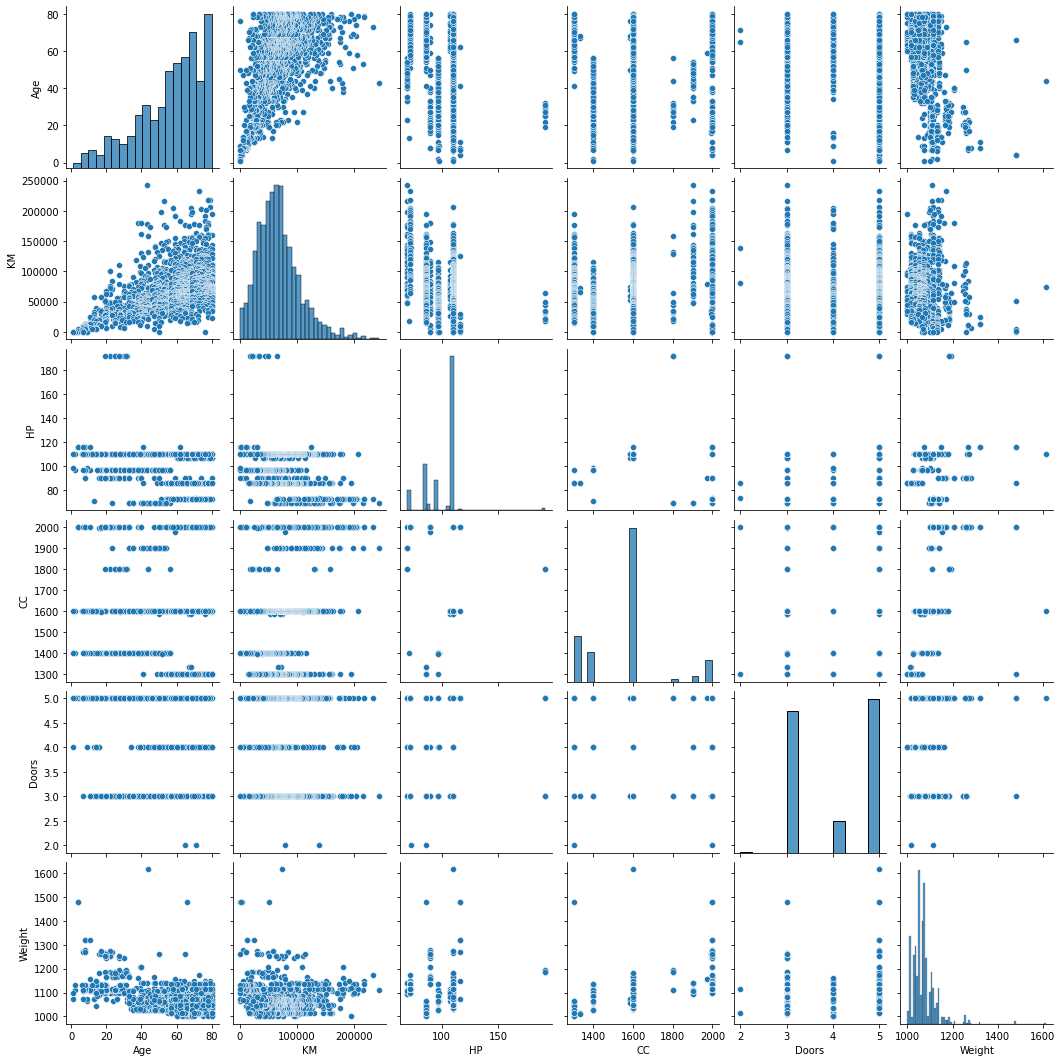

In [8]:
sns.pairplot(df[['Age','KM','HP','CC','Doors','Weight']]);

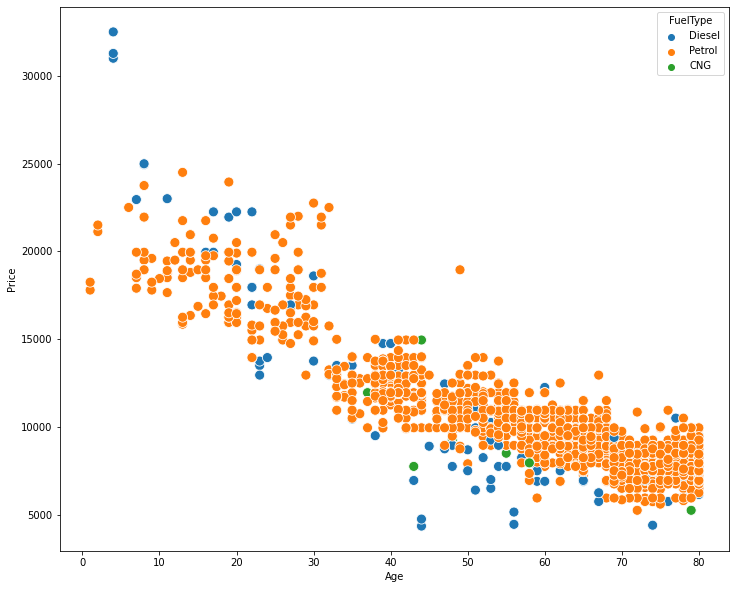

In [9]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = 'Age',y = 'Price', hue = 'FuelType', s = 100)
plt.show()

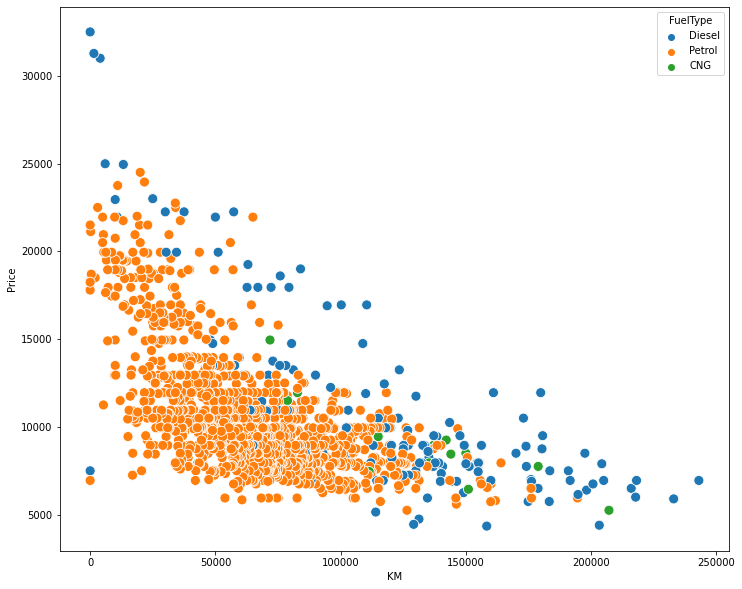

In [10]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = 'KM',y = 'Price', hue = 'FuelType', s = 100)
plt.show()

Offer price for Diesel cars are higher than Petrol cars, even though they are driven more kilometers.

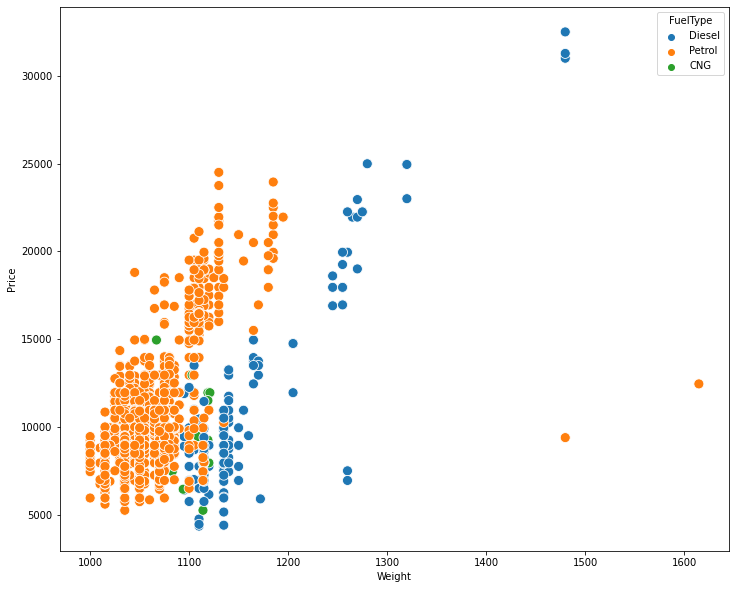

In [11]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = 'Weight',y = 'Price', hue = 'FuelType', s = 100)
plt.show()

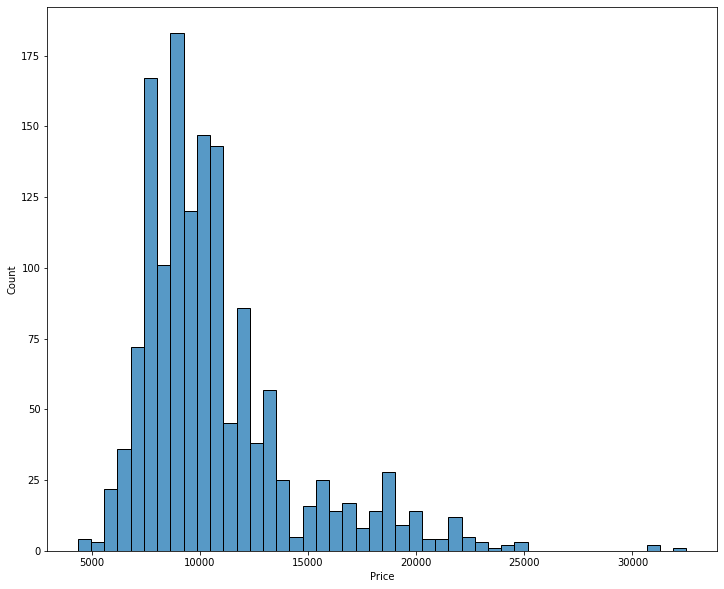

In [12]:
plt.figure(figsize=(12,10))
sns.histplot(data = df, x = 'Price')
plt.show()

In [13]:
df.groupby('FuelType')['Price'].agg(['count', 'mean', 'sum']).round(2)

,count,mean,sum
FuelType,,,
CNG,17,9421.18,160160
Diesel,155,11294.55,1750656
Petrol,1264,10679.31,13498648


In [14]:
df.groupby('FuelType')['KM'].agg(['mean']).round(2)

,mean
FuelType,
CNG,117865.59
Diesel,111977.58
Petrol,62542.34


In [15]:
df.groupby('FuelType')['HP'].agg(['mean']).round(2)

,mean
FuelType,
CNG,110.00
Diesel,78.54
Petrol,104.20


In [16]:
df.groupby('Automatic')['Price'].agg(['count','mean']).round(2)

,count,mean
Automatic,,
0,1356,10701.69
1,80,11224.62


In [17]:
df.groupby('Doors')['Price'].agg(['count','mean']).round(2)

,count,mean
Doors,,
2,2,8100.00
3,622,10107.34
4,138,9806.77
5,674,11503.21


Takeaways:
- Average offer price for Diesel cars are higher.
- Average KM driven is higher for CNG & Diesel cars.
- CNG cars have highest average HP.
- Automatic cars does not have significant average price difference.
- 3 doors & 5 doors cars are more popular.

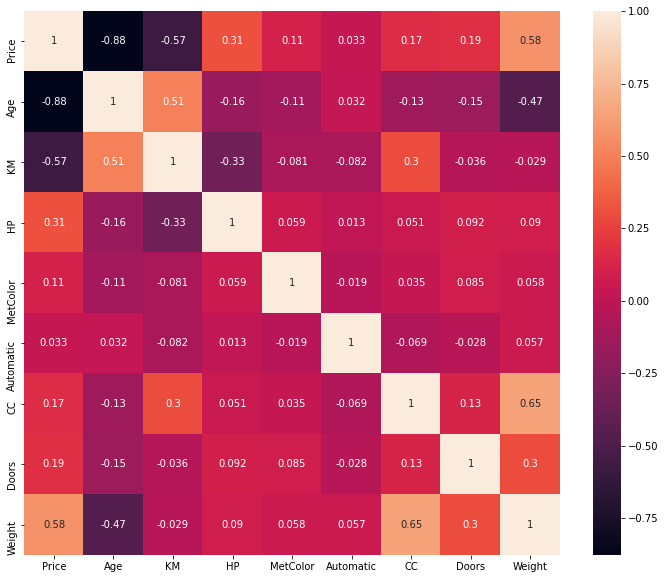

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Highly correlated variables are:
- Age & Price
- Weight & CC

## Price Prediction

Regression models used-
- Linear Regression
- Ridge Regression
- Lasso Regression
- Bayesian Ridge Regression
- Regression tree

Steps:
1. Importing necessary libraries
2. One hot encoding of categorical variables using 'get_dummies'
3. Seperating outcome & predictors.
4. Splitting dataset into training & validation.
5. Performing linear regression
6. Deploying backward regression to determine important varaibles.
7. Deploying more regression models.
9. Measuring error & accuracy
10. Conclusion



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

!pip install dmba --quiet
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart, adjusted_r2_score, backward_elimination, AIC_score, BIC_score

from sklearn.linear_model import Ridge, Lasso, LassoCV, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

no display found. Using non-interactive Agg backend


In [20]:
encoded_df = pd.get_dummies(df, drop_first=True)

In [21]:
encoded_df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,1,0
1,13750,23,72937,90,1,0,2000,3,1165,1,0
2,13950,24,41711,90,1,0,2000,3,1165,1,0
3,14950,26,48000,90,0,0,2000,3,1165,1,0
4,13750,30,38500,90,0,0,2000,3,1170,1,0


In [22]:
outcome = 'Price'
predictors = [s for s in encoded_df if s not in outcome]

In [23]:
X = encoded_df[predictors]
Y = encoded_df[outcome]

train_x, valid_x, train_y, valid_y = train_test_split(X, Y, test_size = .2, random_state = 20)
print(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)

lm = LinearRegression()
lm.fit(train_x, train_y)

(1148, 10) (288, 10) (1148,) (288,)


LinearRegression()

In [24]:
print(lm.intercept_)

-8618.311254769555


In [25]:
lm.score(valid_x, valid_y)

0.8440088413217752

In [26]:
pd.DataFrame(lm.coef_, index = predictors)

,0
Age,-119.776784
KM,-0.015767
HP,45.602299
MetColor,30.296149
Automatic,152.282587
CC,-3.382694
Doors,-26.867990
Weight,24.730335
FuelType_Diesel,2258.827236
FuelType_Petrol,1263.623500


In [27]:
regressionSummary(train_y, lm.predict(train_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1283.0814
            Mean Absolute Error (MAE) : 935.4415
          Mean Percentage Error (MPE) : -1.1985
Mean Absolute Percentage Error (MAPE) : 9.3619


In [28]:
prediction = lm.predict(valid_x)

result = pd.DataFrame({'Predicted': prediction, 'Actual': valid_y, 'Residual': valid_y - prediction})
print(result.head(20))

         Predicted  Actual     Residual
83    17510.178527   17950   439.821473
1129   7966.400941    7750  -216.400941
1368   8839.316005    9750   910.683995
522   11563.975433    9650 -1913.975433
318   12017.231570    9900 -2117.231570
427   10898.189616   12500  1601.810384
19    14917.890866   16950  2032.109134
1215   7197.364956    8950  1752.635044
312   11969.938172   11750  -219.938172
847    9668.019532   10950  1281.980468
1116   8208.216764    6500 -1708.216764
743    9688.327990    8950  -738.327990
141   21895.849594   23950  2054.150406
1222   7774.315948    8250   475.684052
121   18830.405725   19950  1119.594275
1239   6703.228162    6950   246.771838
1149   7265.197385    8050   784.802615
266   12805.958139   12495  -310.958139
329   13057.814585   11695 -1362.814585
1171   7976.023787    6990  -986.023787


In [29]:
regressionSummary(valid_y, prediction)


Regression statistics

                      Mean Error (ME) : 16.6018
       Root Mean Squared Error (RMSE) : 1453.8184
            Mean Absolute Error (MAE) : 966.6011
          Mean Percentage Error (MPE) : -0.8483
Mean Absolute Percentage Error (MAPE) : 9.4444


In [30]:
#backward selection 

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = backward_elimination(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age, KM, HP, MetColor, Automatic, CC, Doors, Weight, FuelType_Diesel, FuelType_Petrol
Start: score=19714.40
Step: score=19712.54, remove MetColor
Step: score=19710.88, remove Doors
Step: score=19709.79, remove Automatic
Step: score=19709.79, remove None
['Age', 'KM', 'HP', 'CC', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']


In [31]:
best_model.score(valid_x[best_variables], valid_y)

0.842965720528668

In [32]:
regressionSummary(valid_y, best_model.predict(valid_x[best_variables]))


Regression statistics

                      Mean Error (ME) : 17.4164
       Root Mean Squared Error (RMSE) : 1458.6712
            Mean Absolute Error (MAE) : 972.1330
          Mean Percentage Error (MPE) : -0.8472
Mean Absolute Percentage Error (MAPE) : 9.5013


Linear Regression model performs better than backward regression. Linear Regression model has higher r2 and lower RMSE, Hence it has higher accuracy.

Running more regression models with default parameters.

In [33]:
#Ridge Regression 

ridge = Ridge()
ridge.fit(train_x, train_y)

print('Score:', ridge.score(valid_x, valid_y))

regressionSummary(valid_y, ridge.predict(valid_x))

Score: 0.842442473707174

Regression statistics

                      Mean Error (ME) : 19.1079
       Root Mean Squared Error (RMSE) : 1461.0994
            Mean Absolute Error (MAE) : 969.1514
          Mean Percentage Error (MPE) : -0.8270
Mean Absolute Percentage Error (MAPE) : 9.4687


In [34]:
#Lasso Regression 

lasso = Lasso()
lasso.fit(train_x, train_y)

print('Score:', lasso.score(valid_x, valid_y))

regressionSummary(valid_y, lasso.predict(valid_x))

Score: 0.842933070815024

Regression statistics

                      Mean Error (ME) : 18.5251
       Root Mean Squared Error (RMSE) : 1458.8228
            Mean Absolute Error (MAE) : 968.8130
          Mean Percentage Error (MPE) : -0.8323
Mean Absolute Percentage Error (MAPE) : 9.4661


In [35]:
#Lasso_cv Regression 

lasso_cv = LassoCV(cv=5)    #5 is default cv value 
lasso_cv.fit(train_x, train_y)

print('Score:', lasso_cv.score(valid_x, valid_y))

regressionSummary(valid_y, lasso_cv.predict(valid_x))

Score: 0.4185401938013624

Regression statistics

                      Mean Error (ME) : -91.1449
       Root Mean Squared Error (RMSE) : 2806.8553
            Mean Absolute Error (MAE) : 2074.9085
          Mean Percentage Error (MPE) : -6.0915
Mean Absolute Percentage Error (MAPE) : 19.7180


In [36]:
#Bayesian Ridge Regression 

bayesianRidge = BayesianRidge()
bayesianRidge.fit(train_x, train_y)

print('Score:', bayesianRidge.score(valid_x, valid_y))

regressionSummary(valid_y, bayesianRidge.predict(valid_x))

Score: 0.8362203518599062

Regression statistics

                      Mean Error (ME) : 32.6143
       Root Mean Squared Error (RMSE) : 1489.6702
            Mean Absolute Error (MAE) : 982.8120
          Mean Percentage Error (MPE) : -0.7147
Mean Absolute Percentage Error (MAPE) : 9.6042


In [37]:
#Regression Tree

param_grid = {
    'max_depth': list(range(2,20)),
    'min_impurity_decrease': [0.0005, 0.001, 0.005, 0.01],
    'min_samples_split': list(range(5,50))}

grid_search = RandomizedSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs= -1)

grid_search.fit(train_x, train_y)
print('Best Parameter:' , grid_search.best_params_)

reg_tree = grid_search.best_estimator_ 

print('Score:', reg_tree.score(valid_x, valid_y))

regressionSummary(train_y, reg_tree.predict(train_x))
regressionSummary(valid_y, reg_tree.predict(valid_x))

Best Parameter: {'min_samples_split': 27, 'min_impurity_decrease': 0.005, 'max_depth': 7}
Score: 0.8820409992586365

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1004.3795
            Mean Absolute Error (MAE) : 741.7728
          Mean Percentage Error (MPE) : -1.0115
Mean Absolute Percentage Error (MAPE) : 7.4542

Regression statistics

                      Mean Error (ME) : 40.1083
       Root Mean Squared Error (RMSE) : 1264.2289
            Mean Absolute Error (MAE) : 942.0290
          Mean Percentage Error (MPE) : -1.1246
Mean Absolute Percentage Error (MAPE) : 9.1931


Model performance of of Lasso, Ridge, LassoCV and BayesianRidge regression model is worse than Linear regression. This indicates that this dataset does not benefit from regularization. However, Regression tree is our best performing model with score of .88 and RMSE of 1286.04